In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
# Read the CSV file
df = pd.read_csv('Processed/Labelled_Data_Complete_Phase(1-4)/france/loreal_france_119961_statistics.csv')

# Filter rows where PHASE column is 3 or 4
filtered_rows = df[df['PHASE'].isin([3, 4])]

# Add a random number between -5 and 5 to 'TAV' and 'SHOT_COUNT' columns where 'SHOT_COUNT' is not zero
filtered_rows.loc[filtered_rows['SHOT_COUNT'] != 0, 'TAV'] = filtered_rows['TAV'] + np.random.randint(-5, 6, size=len(filtered_rows))
filtered_rows.loc[filtered_rows['SHOT_COUNT'] != 0, 'SHOT_COUNT'] = filtered_rows['SHOT_COUNT'] + np.random.randint(-5, 6, size=len(filtered_rows))

# If 'HOUR' column exists in the DataFrame, delete it
if 'HOUR' in df.columns:
    df = df.drop(columns=['HOUR'])

# Append these rows to the end of the DataFrame
df = df.append(filtered_rows)

# Get the last 'HOUR' value in the original DataFrame and add 1 hour
last_hour = pd.to_datetime(df.iloc[-1]['HOUR']) + timedelta(hours=1)

# Create a date range starting from one hour after the last 'HOUR' value with a frequency of 1 hour
date_range = pd.date_range(start=last_hour, periods=len(df), freq='H')

# Add the 'HOUR' column to the DataFrame with the created date range
df['HOUR'] = date_range

c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [14]:
from utils.sliding_window import sliding_window
#Creating a sliding window 
window_size= 720 #window size is in hours (1D= 24, 1W=168, 1M=720)
x,y = sliding_window(df,window_size)

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import os
import datetime

# Function to create the model
def model(X_train,y_train,optimizer):
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[2]
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(n_timesteps,n_features)))
    model.add(TimeDistributed(Dense(n_outputs, activation='softmax')))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Add early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

    # Add TensorBoard logs
    log_dir = os.path.join(
        "logs",
        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    )
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Add the callbacks to the model
    model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[es, tensorboard_callback])

    return model

In [8]:
lstm = model(x,y,'adam')

Epoch 1/30
746/746 [==============================] - 252s 331ms/step - loss: 0.4624 - accuracy: 0.8442 - val_loss: 0.1600 - val_accuracy: 0.9893
Epoch 2/30
746/746 [==============================] - 240s 322ms/step - loss: 0.2106 - accuracy: 0.9301 - val_loss: 0.1123 - val_accuracy: 0.9808
Epoch 3/30
746/746 [==============================] - 242s 325ms/step - loss: 0.1545 - accuracy: 0.9523 - val_loss: 0.1083 - val_accuracy: 0.9725
Epoch 4/30
746/746 [==============================] - 244s 327ms/step - loss: 0.1472 - accuracy: 0.9526 - val_loss: 0.0960 - val_accuracy: 0.9843
Epoch 5/30
746/746 [==============================] - 252s 338ms/step - loss: 0.1248 - accuracy: 0.9593 - val_loss: 0.0816 - val_accuracy: 0.9866
Epoch 6/30
746/746 [==============================] - 331s 444ms/step - loss: 0.1251 - accuracy: 0.9575 - val_loss: 0.0620 - val_accuracy: 0.9885
Epoch 7/30
746/746 [==============================] - 280s 375ms/step - loss: 0.1560 - accuracy: 0.9445 - val_loss: 0.1095 -

In [9]:
lstm.save('Weights/loreal_france_119961_statistics.h5')

555/555 - 38s - loss: 0.1036 - accuracy: 0.9623


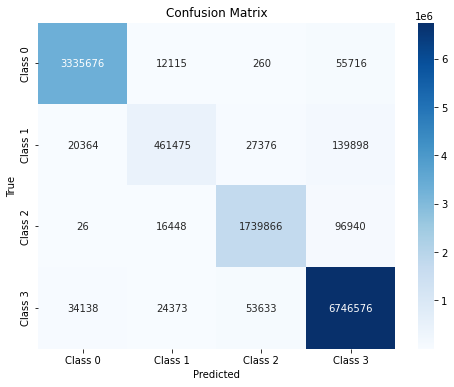

File: loreal_france_119961_statistics.csv, Loss: 0.10361636430025101, Accuracy: 96.23
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98   3403767
           1       0.90      0.71      0.79    649113
           2       0.96      0.94      0.95   1853280
           3       0.96      0.98      0.97   6858720

    accuracy                           0.96  12764880
   macro avg       0.95      0.90      0.92  12764880
weighted avg       0.96      0.96      0.96  12764880

497/497 - 32s - loss: 4.9041 - accuracy: 0.4819


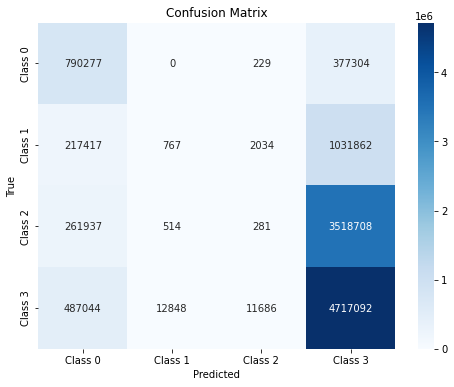

File: loreal_france_119970_statistics.csv, Loss: 4.9040679931640625, Accuracy: 48.19
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.68      0.54   1167810
           1       0.05      0.00      0.00   1252080
           2       0.02      0.00      0.00   3781440
           3       0.49      0.90      0.63   5228670

    accuracy                           0.48  11430000
   macro avg       0.25      0.39      0.29  11430000
weighted avg       0.28      0.48      0.35  11430000

337/337 - 23s - loss: 8.9664 - accuracy: 0.3158


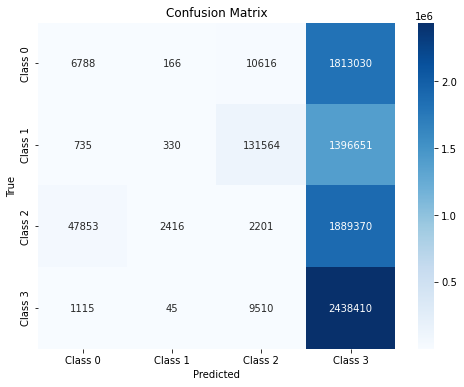

File: loreal_france_119990_statistics.csv, Loss: 8.966438293457031, Accuracy: 31.58
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.00      0.01   1830600
           1       0.11      0.00      0.00   1529280
           2       0.01      0.00      0.00   1941840
           3       0.32      1.00      0.49   2449080

    accuracy                           0.32   7750800
   macro avg       0.14      0.25      0.12   7750800
weighted avg       0.16      0.32      0.16   7750800

474/474 - 35s - loss: 4.0064 - accuracy: 0.6820


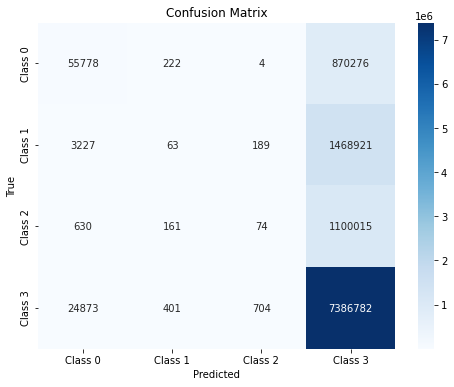

File: loreal_france_119994_statistics.csv, Loss: 4.006416320800781, Accuracy: 68.2
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.06      0.11    926280
           1       0.07      0.00      0.00   1472400
           2       0.08      0.00      0.00   1100880
           3       0.68      1.00      0.81   7412760

    accuracy                           0.68  10912320
   macro avg       0.37      0.26      0.23  10912320
weighted avg       0.54      0.68      0.56  10912320

542/542 - 39s - loss: 1.8231 - accuracy: 0.8320


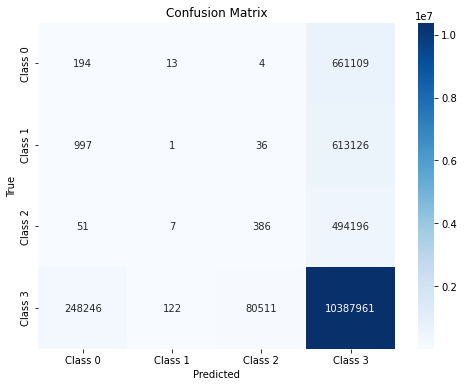

File: loreal_france_119998_statistics.csv, Loss: 1.8231422901153564, Accuracy: 83.2
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    661320
           1       0.01      0.00      0.00    614160
           2       0.00      0.00      0.00    494640
           3       0.85      0.97      0.91  10716840

    accuracy                           0.83  12486960
   macro avg       0.22      0.24      0.23  12486960
weighted avg       0.73      0.83      0.78  12486960

246/246 - 16s - loss: 9.3514 - accuracy: 0.2380


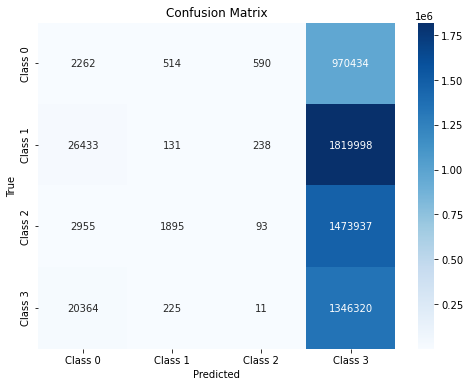

File: loreal_france_120006_statistics.csv, Loss: 9.351393699645996, Accuracy: 23.8
Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.00      0.00    973800
           1       0.05      0.00      0.00   1846800
           2       0.10      0.00      0.00   1478880
           3       0.24      0.98      0.39   1366920

    accuracy                           0.24   5666400
   macro avg       0.11      0.25      0.10   5666400
weighted avg       0.11      0.24      0.09   5666400

623/623 - 43s - loss: 3.0158 - accuracy: 0.5604


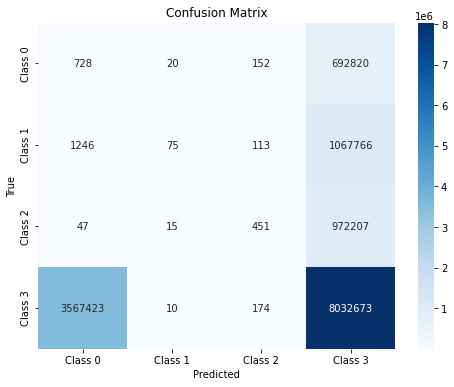

File: loreal_france_120010_statistics.csv, Loss: 3.0158445835113525, Accuracy: 56.04
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    693720
           1       0.62      0.00      0.00   1069200
           2       0.51      0.00      0.00    972720
           3       0.75      0.69      0.72  11600280

    accuracy                           0.56  14335920
   macro avg       0.47      0.17      0.18  14335920
weighted avg       0.68      0.56      0.58  14335920

471/471 - 30s - loss: 4.5404 - accuracy: 0.6175


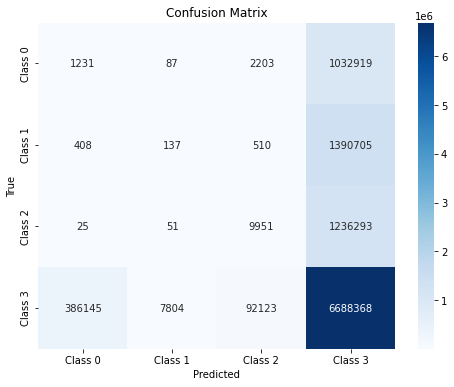

File: loreal_france_120018_statistics.csv, Loss: 4.540384292602539, Accuracy: 61.75
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00   1036440
           1       0.02      0.00      0.00   1391760
           2       0.09      0.01      0.01   1246320
           3       0.65      0.93      0.76   7174440

    accuracy                           0.62  10848960
   macro avg       0.19      0.24      0.20  10848960
weighted avg       0.44      0.62      0.51  10848960

607/607 - 43s - loss: 4.2555 - accuracy: 0.6559


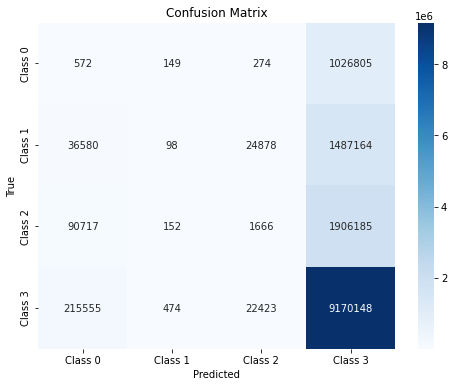

File: loreal_france_120030_statistics.csv, Loss: 4.2555060386657715, Accuracy: 65.59
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00   1027800
           1       0.11      0.00      0.00   1548720
           2       0.03      0.00      0.00   1998720
           3       0.67      0.97      0.80   9408600

    accuracy                           0.66  13983840
   macro avg       0.21      0.24      0.20  13983840
weighted avg       0.47      0.66      0.54  13983840

213/213 - 12s - loss: 12.4796 - accuracy: 0.0042


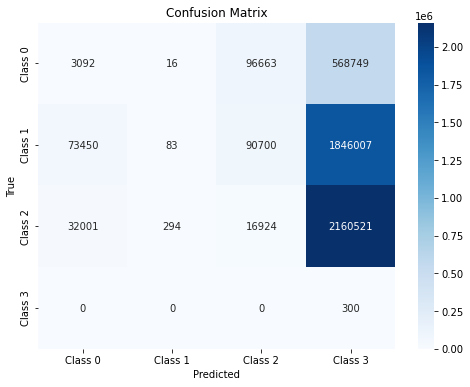

File: loreal_france_120034_statistics.csv, Loss: 12.47956371307373, Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.03      0.00      0.01    668520
           1       0.21      0.00      0.00   2010240
           2       0.08      0.01      0.01   2209740
           3       0.00      1.00      0.00       300

    accuracy                           0.00   4888800
   macro avg       0.08      0.25      0.01   4888800
weighted avg       0.13      0.00      0.01   4888800

641/641 - 39s - loss: 1.8094 - accuracy: 0.8292


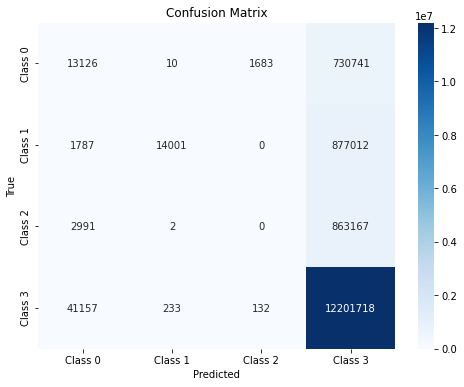

File: loreal_france_120042_statistics.csv, Loss: 1.8094490766525269, Accuracy: 82.92
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.02      0.03    745560
           1       0.98      0.02      0.03    892800
           2       0.00      0.00      0.00    866160
           3       0.83      1.00      0.91  12243240

    accuracy                           0.83  14747760
   macro avg       0.51      0.26      0.24  14747760
weighted avg       0.76      0.83      0.76  14747760

270/270 - 16s - loss: 7.7068 - accuracy: 0.4151


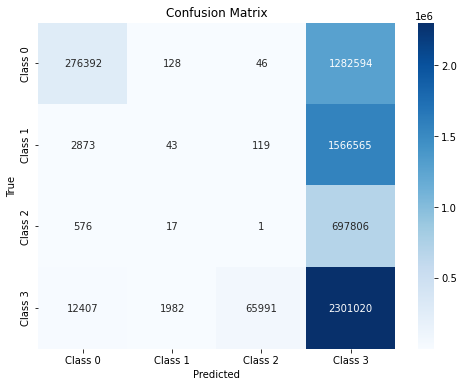

File: loreal_france_120046_statistics.csv, Loss: 7.706825256347656, Accuracy: 41.51
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.18      0.30   1559160
           1       0.02      0.00      0.00   1569600
           2       0.00      0.00      0.00    698400
           3       0.39      0.97      0.56   2381400

    accuracy                           0.42   6208560
   macro avg       0.34      0.29      0.21   6208560
weighted avg       0.39      0.42      0.29   6208560

284/284 - 16s - loss: 10.2658 - accuracy: 0.1105


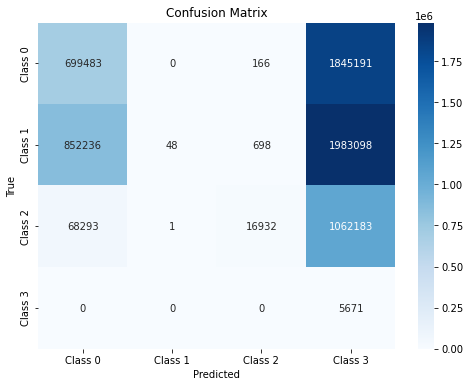

File: loreal_france_120050_statistics.csv, Loss: 10.265779495239258, Accuracy: 11.05
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.27      0.34   2544840
           1       0.98      0.00      0.00   2836080
           2       0.95      0.01      0.03   1147409
           3       0.00      1.00      0.00      5671

    accuracy                           0.11   6534000
   macro avg       0.59      0.32      0.09   6534000
weighted avg       0.76      0.11      0.14   6534000

280/280 - 17s - loss: 8.7939 - accuracy: 0.2798


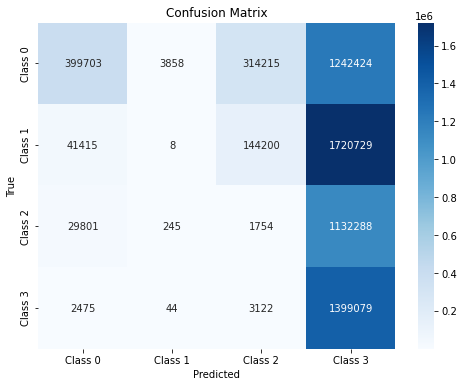

File: loreal_france_120138_statistics.csv, Loss: 8.793874740600586, Accuracy: 27.98
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.20      0.33   1960200
           1       0.00      0.00      0.00   1906352
           2       0.00      0.00      0.00   1164088
           3       0.25      1.00      0.41   1404720

    accuracy                           0.28   6435360
   macro avg       0.28      0.30      0.18   6435360
weighted avg       0.31      0.28      0.19   6435360

420/420 - 24s - loss: 6.9718 - accuracy: 0.4045


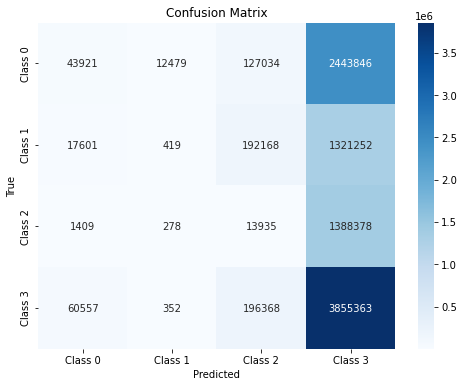

File: loreal_france_120142_statistics.csv, Loss: 6.971829414367676, Accuracy: 40.45
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.02      0.03   2627280
           1       0.03      0.00      0.00   1531440
           2       0.03      0.01      0.01   1404000
           3       0.43      0.94      0.59   4112640

    accuracy                           0.40   9675360
   macro avg       0.21      0.24      0.16   9675360
weighted avg       0.29      0.40      0.26   9675360

261/261 - 16s - loss: 9.8642 - accuracy: 0.2414


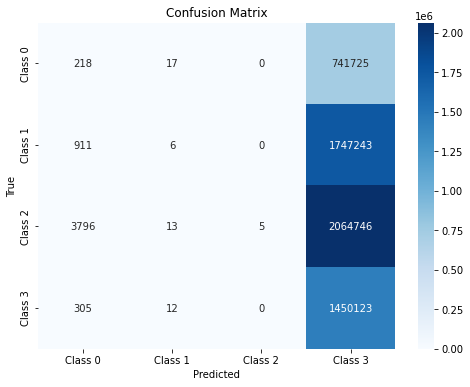

File: loreal_france_6575633_statistics.csv, Loss: 9.864214897155762, Accuracy: 24.14
Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.00      0.00    741960
           1       0.12      0.00      0.00   1748160
           2       1.00      0.00      0.00   2068560
           3       0.24      1.00      0.39   1450440

    accuracy                           0.24   6009120
   macro avg       0.35      0.25      0.10   6009120
weighted avg       0.44      0.24      0.09   6009120



In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have already trained and defined your model
from keras.models import load_model
model=load_model('Weights/loreal_france_119961_statistics.h5')

# Folder containing CSV files
folder_path = 'Processed/Labelled_Data/france/'

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Construct the full path to the CSV file
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file
        df = pd.read_csv(file_path)
        df.fillna(0, inplace=True)
        df = df[['HOUR', 'CT', 'TAV', 'SHOT_COUNT', 'PHASE']]

        # Assuming df is your DataFrame and 'HOUR' is your time column
        df['HOUR'] = pd.to_datetime(df['HOUR'], format='%Y-%m-%d %H:%M:%S')
        df = df.sort_values('HOUR')
        features_considered = ['CT', 'TAV', 'SHOT_COUNT']

        # One-hot encoding the 'PHASE' feature
        y = pd.get_dummies(df['PHASE']).values

        # Creating the sliding window
        def create_dataset(X, y, time_steps=1):
            Xs, ys = [], []
            for i in range(len(X) - time_steps):
                v = X.iloc[i:(i + time_steps)].values
                Xs.append(v)
                ys.append(y[i:i + time_steps])
            return np.array(Xs), np.array(ys)

        time_steps = 720  # Represents 30 days of hourly data

        # Reshape to [samples, time_steps, n_features]
        X, y = create_dataset(df[features_considered], y, time_steps)

        # Evaluate the model on the data
        loss, accuracy = model.evaluate(X, y, verbose=2)

        # Make predictions
        y_pred = model.predict(X)
        y_true = np.argmax(y, axis=2)
        y_pred = np.argmax(y_pred, axis=2)

        # Generate classification report
        report = classification_report(y_true.flatten(), y_pred.flatten())

        # Generate confusion matrix
        cm = confusion_matrix(y_true.flatten(), y_pred.flatten())

        # Plot the heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(cm.shape[0])], yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Print filename, loss, accuracy, and classification report
        print(f"File: {filename}, Loss: {loss}, Accuracy: {np.round(accuracy * 100, 2)}")
        print("Classification Report:\n", report)


516/516 - 32s - loss: 8.1088 - accuracy: 0.1329


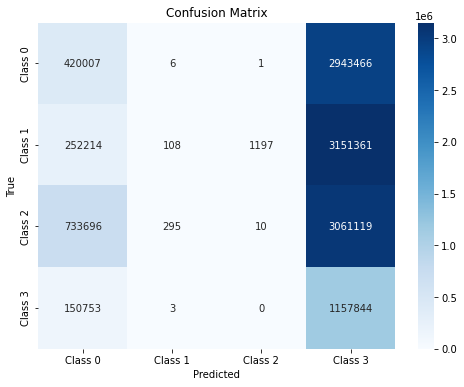

File: abb_china_36405_statistics.csv, Loss: 8.108778953552246, Accuracy: 13.29
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.12      0.17   3363480
           1       0.26      0.00      0.00   3404880
           2       0.01      0.00      0.00   3795120
           3       0.11      0.88      0.20   1308600

    accuracy                           0.13  11872080
   macro avg       0.16      0.25      0.09  11872080
weighted avg       0.17      0.13      0.07  11872080

543/543 - 36s - loss: 7.8694 - accuracy: 0.2194


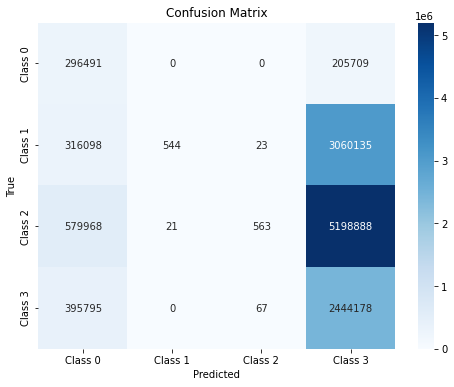

File: abb_china_36435_statistics.csv, Loss: 7.869418621063232, Accuracy: 21.94
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.59      0.28    502200
           1       0.96      0.00      0.00   3376800
           2       0.86      0.00      0.00   5779440
           3       0.22      0.86      0.36   2840040

    accuracy                           0.22  12498480
   macro avg       0.56      0.36      0.16  12498480
weighted avg       0.72      0.22      0.09  12498480

468/468 - 29s - loss: 5.7018 - accuracy: 0.4412


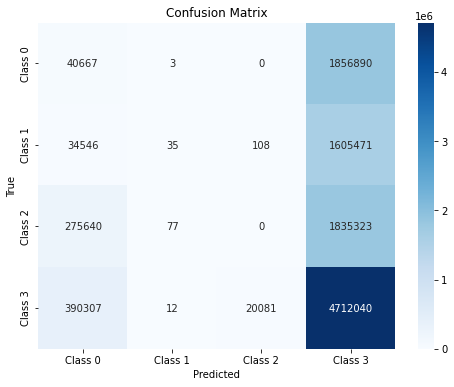

File: abb_china_36440_statistics.csv, Loss: 5.701837062835693, Accuracy: 44.12
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.02      0.03   1897560
           1       0.28      0.00      0.00   1640160
           2       0.00      0.00      0.00   2111040
           3       0.47      0.92      0.62   5122440

    accuracy                           0.44  10771200
   macro avg       0.20      0.24      0.16  10771200
weighted avg       0.28      0.44      0.30  10771200

430/430 - 28s - loss: 7.2713 - accuracy: 0.3252


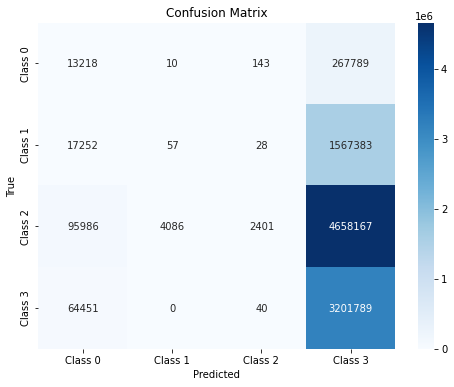

File: abb_china_36445_statistics.csv, Loss: 7.271276950836182, Accuracy: 32.52
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.05      0.06    281160
           1       0.01      0.00      0.00   1584720
           2       0.92      0.00      0.00   4760640
           3       0.33      0.98      0.49   3266280

    accuracy                           0.33   9892800
   macro avg       0.33      0.26      0.14   9892800
weighted avg       0.56      0.33      0.17   9892800

483/483 - 30s - loss: 3.3317 - accuracy: 0.6870


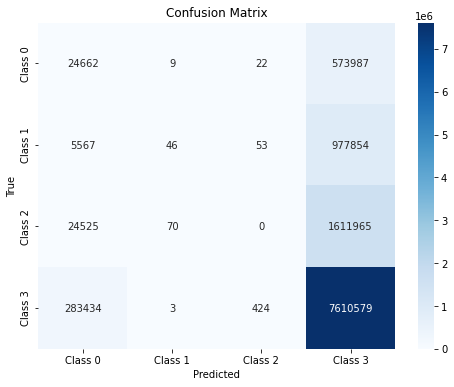

File: abb_china_36450_statistics.csv, Loss: 3.3316900730133057, Accuracy: 68.7
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.04      0.05    598680
           1       0.36      0.00      0.00    983520
           2       0.00      0.00      0.00   1636560
           3       0.71      0.96      0.82   7894440

    accuracy                           0.69  11113200
   macro avg       0.28      0.25      0.22  11113200
weighted avg       0.54      0.69      0.58  11113200

488/488 - 31s - loss: 9.6027 - accuracy: 0.0056


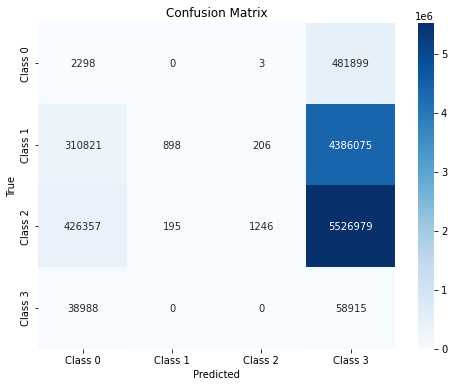

File: abb_china_36455_statistics.csv, Loss: 9.60268783569336, Accuracy: 0.56
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    484200
           1       0.82      0.00      0.00   4698000
           2       0.86      0.00      0.00   5954777
           3       0.01      0.60      0.01     97903

    accuracy                           0.01  11234880
   macro avg       0.42      0.15      0.00  11234880
weighted avg       0.80      0.01      0.00  11234880

483/483 - 30s - loss: 5.8599 - accuracy: 0.4069


c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

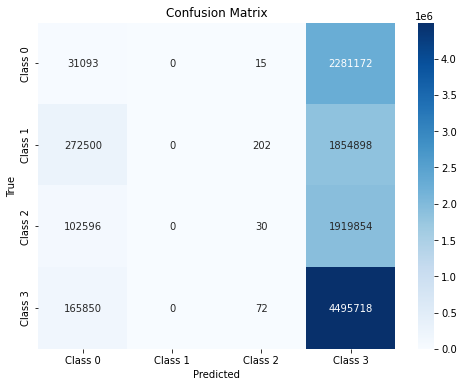

File: abb_china_36460_statistics.csv, Loss: 5.859932899475098, Accuracy: 40.69
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.01      0.02   2312280
           1       0.00      0.00      0.00   2127600
           2       0.09      0.00      0.00   2022480
           3       0.43      0.96      0.59   4661640

    accuracy                           0.41  11124000
   macro avg       0.14      0.24      0.15  11124000
weighted avg       0.21      0.41      0.25  11124000

543/543 - 37s - loss: 4.8796 - accuracy: 0.4437


c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

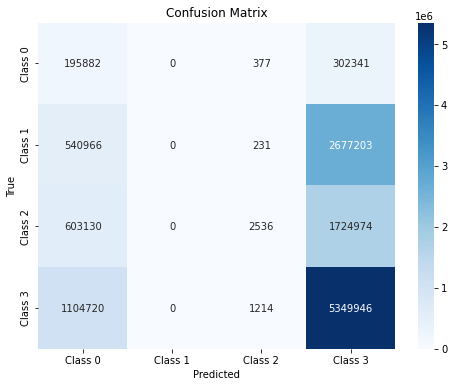

File: abb_china_36475_statistics.csv, Loss: 4.87962532043457, Accuracy: 44.37
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.39      0.13    498600
           1       0.00      0.00      0.00   3218400
           2       0.58      0.00      0.00   2330640
           3       0.53      0.83      0.65   6455880

    accuracy                           0.44  12503520
   macro avg       0.30      0.31      0.20  12503520
weighted avg       0.39      0.44      0.34  12503520

460/460 - 31s - loss: 5.8225 - accuracy: 0.3544


c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\uikra\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

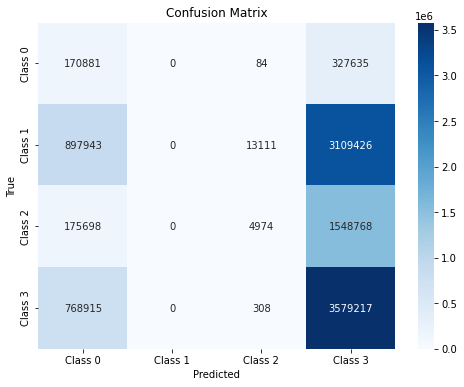

File: abb_china_36480_statistics.csv, Loss: 5.822514533996582, Accuracy: 35.44
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.34      0.14    498600
           1       0.00      0.00      0.00   4020480
           2       0.27      0.00      0.01   1729440
           3       0.42      0.82      0.55   4348440

    accuracy                           0.35  10596960
   macro avg       0.19      0.29      0.17  10596960
weighted avg       0.22      0.35      0.23  10596960

479/479 - 40s - loss: 8.4519 - accuracy: 0.1117


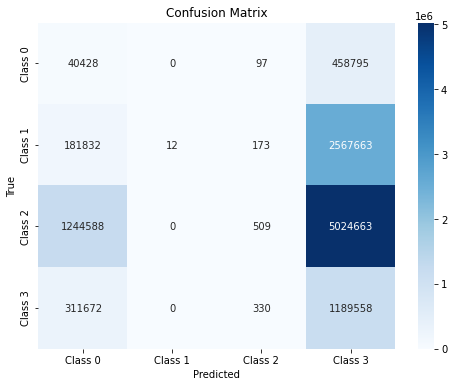

File: abb_china_36497_statistics.csv, Loss: 8.451887130737305, Accuracy: 11.17
Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.08      0.04    499320
           1       1.00      0.00      0.00   2749680
           2       0.46      0.00      0.00   6269760
           3       0.13      0.79      0.22   1501560

    accuracy                           0.11  11020320
   macro avg       0.40      0.22      0.06  11020320
weighted avg       0.53      0.11      0.03  11020320

489/489 - 43s - loss: 5.1046 - accuracy: 0.3874


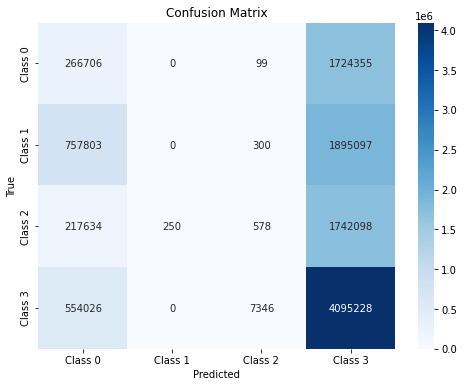

File: abb_china_36501_statistics.csv, Loss: 5.104638576507568, Accuracy: 38.74
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.13      0.14   1991160
           1       0.00      0.00      0.00   2653200
           2       0.07      0.00      0.00   1960560
           3       0.43      0.88      0.58   4656600

    accuracy                           0.39  11261520
   macro avg       0.16      0.25      0.18  11261520
weighted avg       0.22      0.39      0.26  11261520

454/454 - 38s - loss: 7.4198 - accuracy: 0.1344


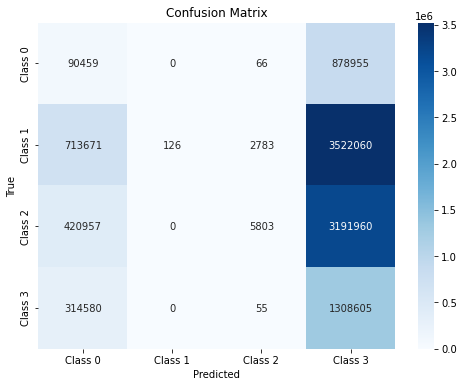

File: abb_china_36505_statistics.csv, Loss: 7.419824123382568, Accuracy: 13.44
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.09      0.07    969480
           1       1.00      0.00      0.00   4238640
           2       0.67      0.00      0.00   3618720
           3       0.15      0.81      0.25   1623240

    accuracy                           0.13  10450080
   macro avg       0.47      0.23      0.08  10450080
weighted avg       0.66      0.13      0.05  10450080



In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have already trained and defined your model
from keras.models import load_model
model=load_model('Weights/loreal_france_119961_statistics.h5')

# Folder containing CSV files
folder_path = 'Processed/Labelled_Data/china/'

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Construct the full path to the CSV file
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file
        df = pd.read_csv(file_path)
        df.fillna(0, inplace=True)
        df = df[['HOUR', 'CT', 'TAV', 'SHOT_COUNT', 'PHASE']]

        # Assuming df is your DataFrame and 'HOUR' is your time column
        df['HOUR'] = pd.to_datetime(df['HOUR'], format='%Y-%m-%d %H:%M:%S')
        df = df.sort_values('HOUR')
        features_considered = ['CT', 'TAV', 'SHOT_COUNT']

        # One-hot encoding the 'PHASE' feature
        y = pd.get_dummies(df['PHASE']).values

        # Creating the sliding window
        def create_dataset(X, y, time_steps=1):
            Xs, ys = [], []
            for i in range(len(X) - time_steps):
                v = X.iloc[i:(i + time_steps)].values
                Xs.append(v)
                ys.append(y[i:i + time_steps])
            return np.array(Xs), np.array(ys)

        time_steps = 720  # Represents 30 days of hourly data

        # Reshape to [samples, time_steps, n_features]
        X, y = create_dataset(df[features_considered], y, time_steps)

        # Evaluate the model on the data
        loss, accuracy = model.evaluate(X, y, verbose=2)

        # Make predictions
        y_pred = model.predict(X)
        y_true = np.argmax(y, axis=2)
        y_pred = np.argmax(y_pred, axis=2)

        # Generate classification report
        report = classification_report(y_true.flatten(), y_pred.flatten())

        # Generate confusion matrix
        cm = confusion_matrix(y_true.flatten(), y_pred.flatten())

        # Plot the heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in range(cm.shape[0])], yticklabels=[f"Class {i}" for i in range(cm.shape[0])])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        # Print filename, loss, accuracy, and classification report
        print(f"File: {filename}, Loss: {loss}, Accuracy: {np.round(accuracy * 100, 2)}")
        print("Classification Report:\n", report)
